# Import modules

In [1]:
import PFN_model
from PFN_model import PFN, BuildSSInitial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load stimulus file created from MPC (e.g. '**stims.csv')

In [2]:
stimuli = pd.read_csv('model-stims_bio-validation_varying-control_corrected.csv')

In [3]:
stim_list = [stimuli[stimuli.obj_id==i] for i in np.unique(stimuli.obj_id)]

In [4]:
len(stim_list)

6

In [5]:
stimuli.columns

Index(['samplenum', 'time', 'obj_id', 'heading', 'course_dir',
       'groundspeed_angle', 'airspeed', 'gamma', 'gspd', 'psi', 'zeta', 'wspd',
       'altitude', 'fspd', 'thrust', 'thrust_angle', 'torque', 'xpos', 'ypos',
       'vpara_input', 'vperp_input', 'phi_input', 'sim1_course_dir',
       'sim1_xpos', 'sim1_ypos', 'sim1_zeta', 'voltage_corr'],
      dtype='object')

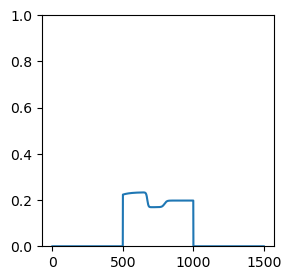

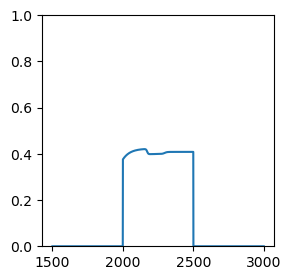

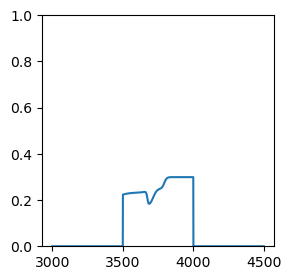

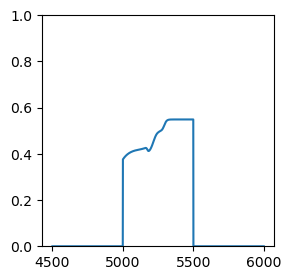

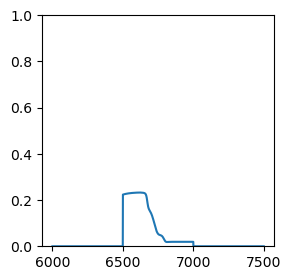

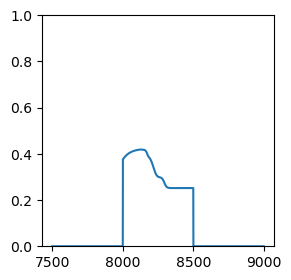

In [10]:
for s in stim_list:
    fig,ax = plt.subplots(figsize=(3,3))
    ax.plot(s.gspd)
    ax.set_ylim(0,1)

for s in stim_list:
    s.gspd.iloc[:500] = 0
    s.gspd.iloc[-500:] = 0
    s.fspd.iloc[:500] = 0
    s.fspd.iloc[-500:] = 0

newstims = stim_list[0].copy()
for s in range(1,len(stim_list)):
    newstims = pd.concat([newstims,stim_list[s]])
    

newstims

newstims.to_csv('model-stims_bio-validation_varying-control_corrected.csv')

# Compute & plot model predictions (amplitudes)

[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [-0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-0.  0.]
 [ 0.  0.]]
[[ 0.  0.]
 [ 0. -0.]
 [ 0. -0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


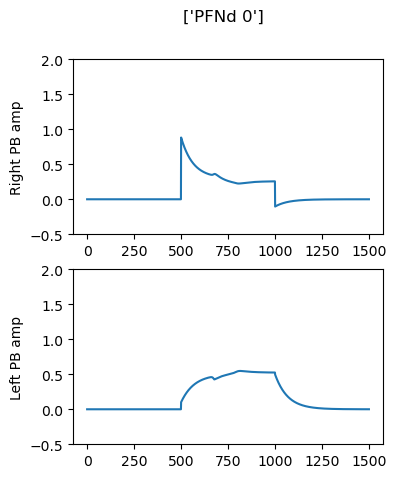

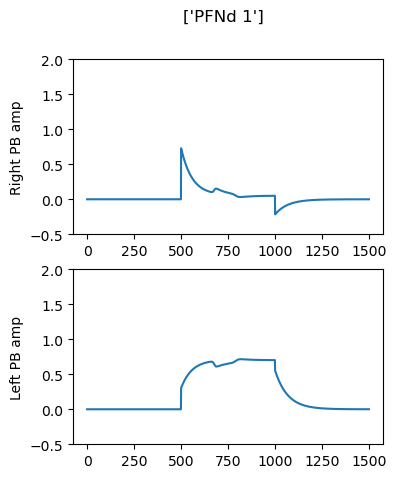

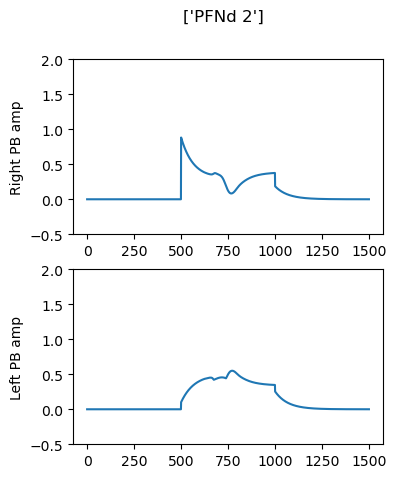

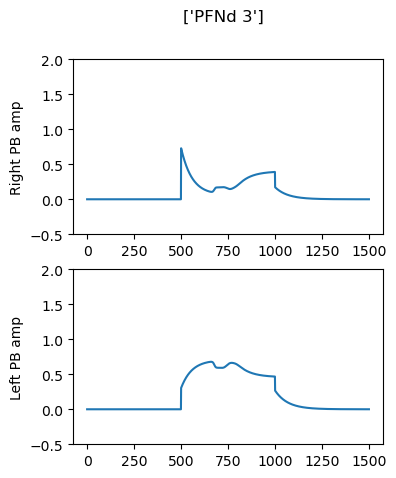

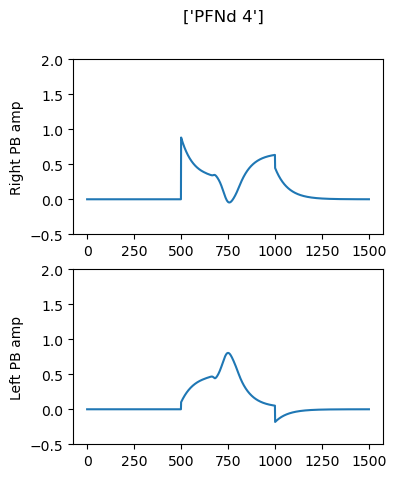

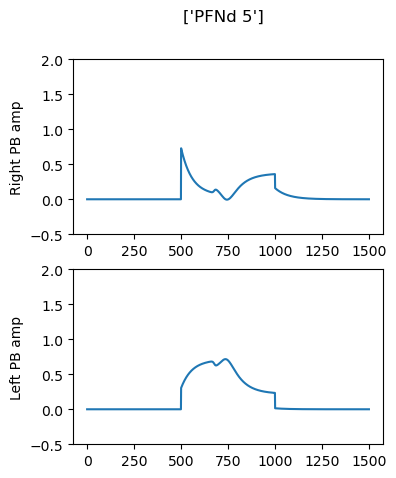

In [12]:
count=0
for stimulus in stim_list:    
    ## Model PFN activity during trajectory
    pfnmodel = PFN()

    p_d = pfnmodel.model_param['PFNd']
    p_v = pfnmodel.model_param['PFNv']
    p_pc = pfnmodel.model_param['PFNpc']
    p_a = pfnmodel.model_param['PFNa']
    AF = [-stimulus['gamma'].copy().iloc[0], 100*stimulus['airspeed'].copy().iloc[0]]
    OF = [-stimulus['psi'].copy().iloc[0], 100*stimulus['gspd'].copy().iloc[0]]   # "gspd" is actually OF speed
    bump = [-stimulus['heading'].copy().iloc[0], -stimulus['gamma'].copy().iloc[0], 100*stimulus['airspeed'].copy().iloc[0]]
    initcond = BuildSSInitial(p_d, p_v, p_pc, p_a, AF, OF, bump)
    
    print(initcond)
    
    pfnmodel.run(tsim=np.array(stimulus['time']),
                  phi=-np.array(stimulus['heading']),
                  a=100*np.array(stimulus['airspeed']),
                  gamma=-np.array(stimulus['gamma']),
                  g=100*np.array(stimulus['gspd']),
                  psi=-np.array(stimulus['psi']),
                  initcond=initcond)

    inputs = {}

    inputs['obj_id'] = count

    signals = list(pfnmodel.res.keys())
    for label in signals:
        inputs[label] = pfnmodel.res[label]
    
    fig,ax = plt.subplots(2,1,figsize=(4,5))
    ax[0].plot(pfnmodel.res['PFNd_ampR'])
    ax[1].plot(pfnmodel.res['PFNd_ampL'])
    fig.suptitle(['PFNd '+str(count)])
    ax[0].set_ylabel('Right PB amp')
    ax[1].set_ylabel('Left PB amp')
    ax[0].set_ylim(-0.5,2)
    ax[1].set_ylim(-0.5,2)
    
    
    count+=1